In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
import numpy as np

In [2]:
os.chdir(os.path.join(os.path.sep, 'home', 'tkokkeng', 'Documents', 'comfort-study'))
os.getcwd()

'/home/tkokkeng/Documents/comfort-study'

In [3]:
import sys
if os.path.join(os.getcwd(), 'source') not in sys.path:
    sys.path.append(os.path.join(os.getcwd(), 'source'))
sys.path

['/home/tkokkeng/Documents/comfort-study',
 '/home/tkokkeng/Documents/comfort-study/source',
 '/home/tkokkeng/python/python367/comfort-study-venv/lib/python36.zip',
 '/home/tkokkeng/python/python367/comfort-study-venv/lib/python3.6',
 '/home/tkokkeng/python/python367/comfort-study-venv/lib/python3.6/lib-dynload',
 '/usr/lib/python3.6',
 '',
 '/home/tkokkeng/python/python367/comfort-study-venv/lib/python3.6/site-packages',
 '/home/tkokkeng/.local/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/home/tkokkeng/.local/lib/python3.6/site-packages/IPython/extensions',
 '/home/tkokkeng/.ipython']

## Load data

In [4]:
all_data = pd.read_excel(io=os.path.join('data', 'data_transformed.xlsx'), sheet_name=None)

In [5]:
len(all_data)

9

In [6]:
all_data.keys()

odict_keys(['lower zone', 'lower + A', 'lower + B', 'lower + C', 'upper zone', 'upper + A', 'upper + B', 'upper + C', 'upper + D'])

In [7]:
survey_titles = all_data['lower zone'].columns.tolist()
survey_titles

['时间戳记',
 'Which Zone are you sitting in',
 'What is your gender?',
 'What is your clothing like?',
 'Do you feel you have adequate restsleep the previous night?',
 'Indoor environment perception [Temperature]',
 '[Air movement]',
 '[Air Quality]',
 'Indoor Environmental Satisfaction [Temperature]',
 'Indoor Environmental Satisfaction [Air movement]',
 'Indoor Environmental Satisfaction [Air quality]',
 'Indoor Environmental Satisfaction [Overall]',
 'How much do you experience the following [Headaches]',
 'How much do you experience the following [Difficulty in concentration]',
 'How much do you experience the following [Dry skin]',
 'How much do you experience the following [Sleepiness]',
 'How much do you experience the following [Eye irritation]',
 'How much do you experience the following [Throat irritation]',
 'How much do you experience the following [Running nose]',
 'How much do you experience the following [SneezingCoughing]']

In [8]:
del survey_titles[:5]
survey_titles

['Indoor environment perception [Temperature]',
 '[Air movement]',
 '[Air Quality]',
 'Indoor Environmental Satisfaction [Temperature]',
 'Indoor Environmental Satisfaction [Air movement]',
 'Indoor Environmental Satisfaction [Air quality]',
 'Indoor Environmental Satisfaction [Overall]',
 'How much do you experience the following [Headaches]',
 'How much do you experience the following [Difficulty in concentration]',
 'How much do you experience the following [Dry skin]',
 'How much do you experience the following [Sleepiness]',
 'How much do you experience the following [Eye irritation]',
 'How much do you experience the following [Throat irritation]',
 'How much do you experience the following [Running nose]',
 'How much do you experience the following [SneezingCoughing]']

In [9]:
zones = list(all_data.keys())
zones

['lower zone',
 'lower + A',
 'lower + B',
 'lower + C',
 'upper zone',
 'upper + A',
 'upper + B',
 'upper + C',
 'upper + D']

## Determine all classes for each survey

In [10]:
set(all_data['lower zone']['[Air movement]'].value_counts().index)

{'A little strong', 'A little weak', 'Just nice', 'None', 'Weak'}

In [11]:
'Just nice' in all_data['lower zone']['[Air movement]'].value_counts().index

True

In [12]:
class_dict = {}
for title in survey_titles:
    classes = set()
    for zone in zones:
        classes = classes.union(set(all_data[zone][title].value_counts().index))
    class_dict[title] = classes

In [13]:
class_dict.get('[Air movement]')

{'A little strong',
 'A little weak',
 'Far too strong',
 'Just nice',
 'None',
 'Strong',
 'Weak'}

## Plot data

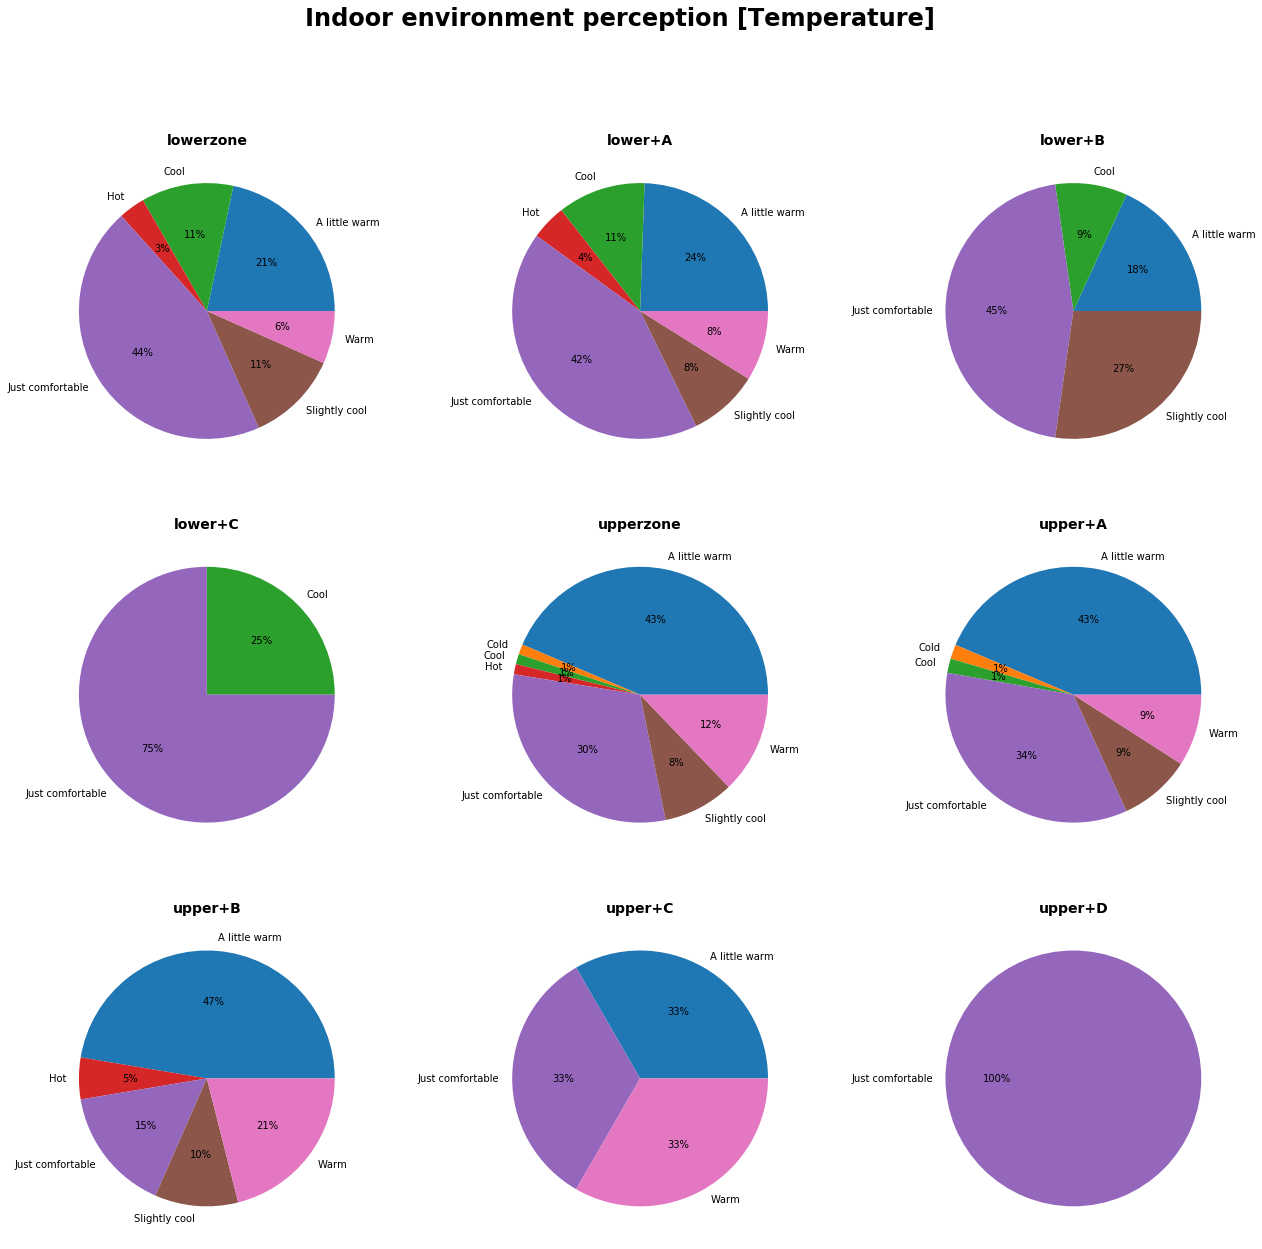

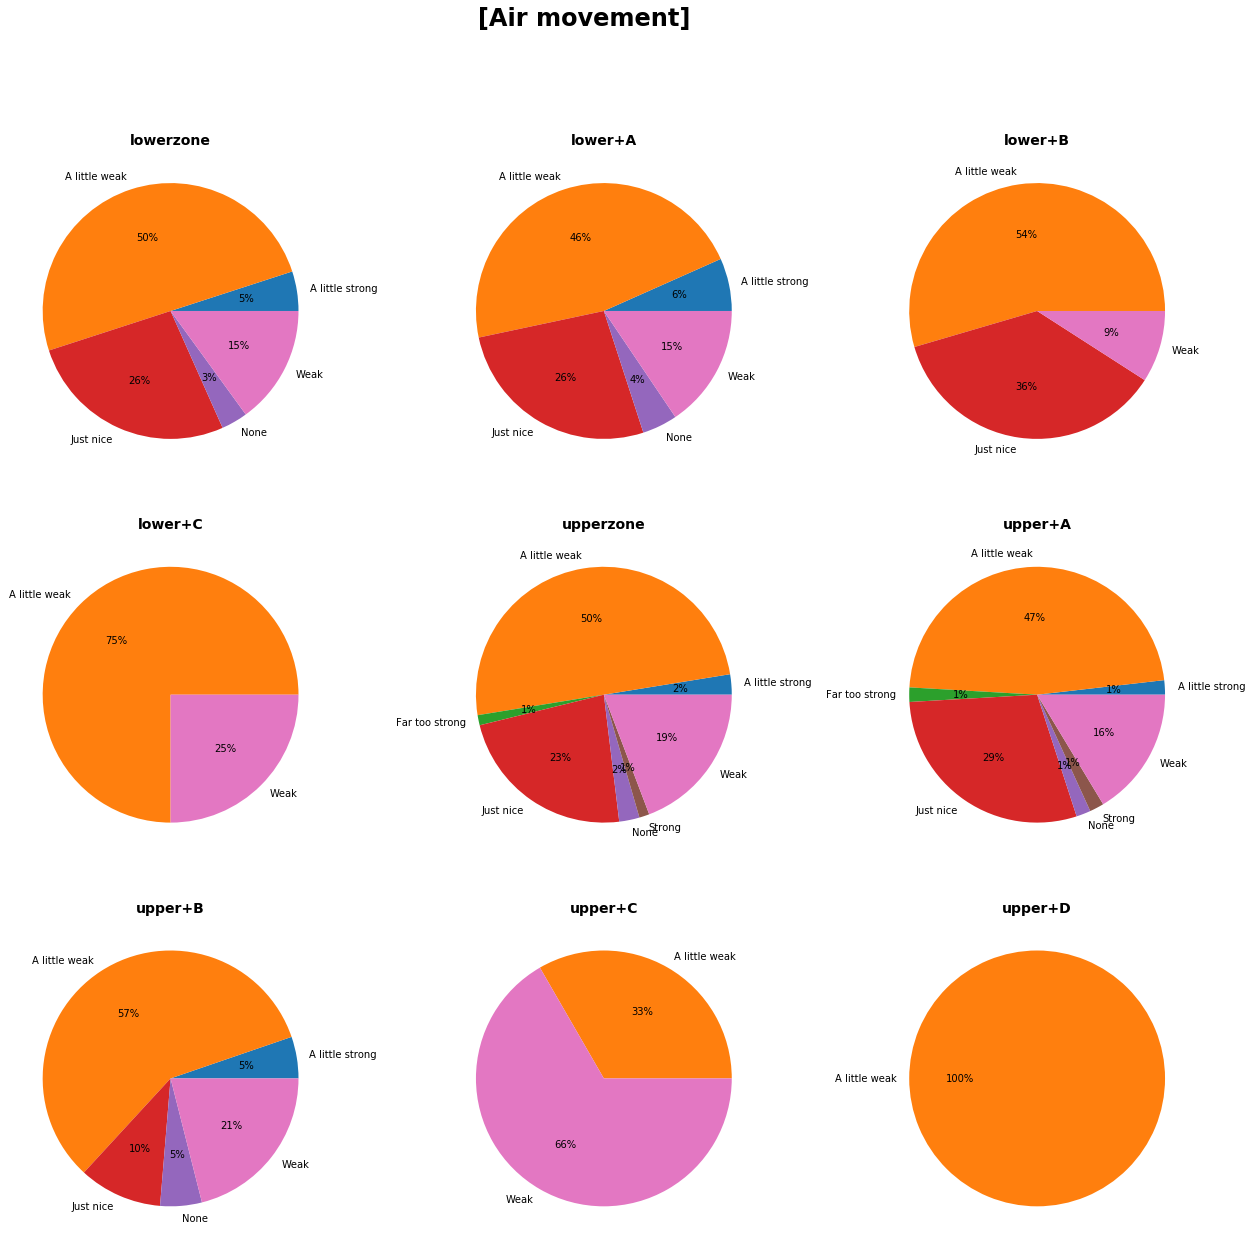

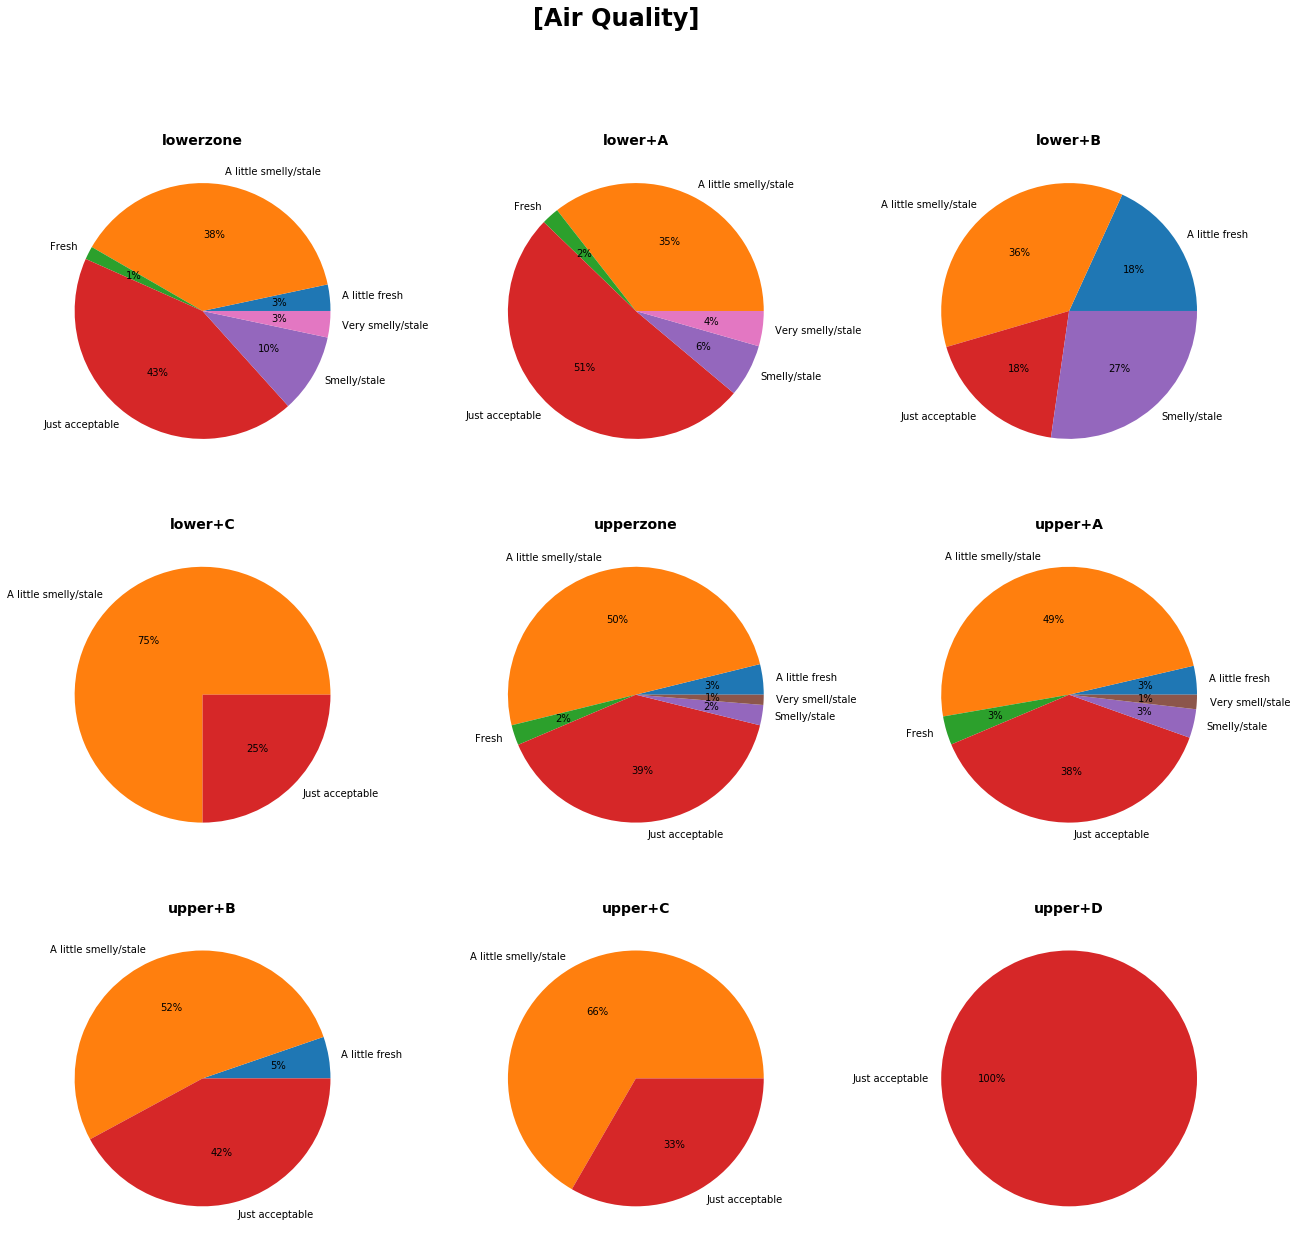

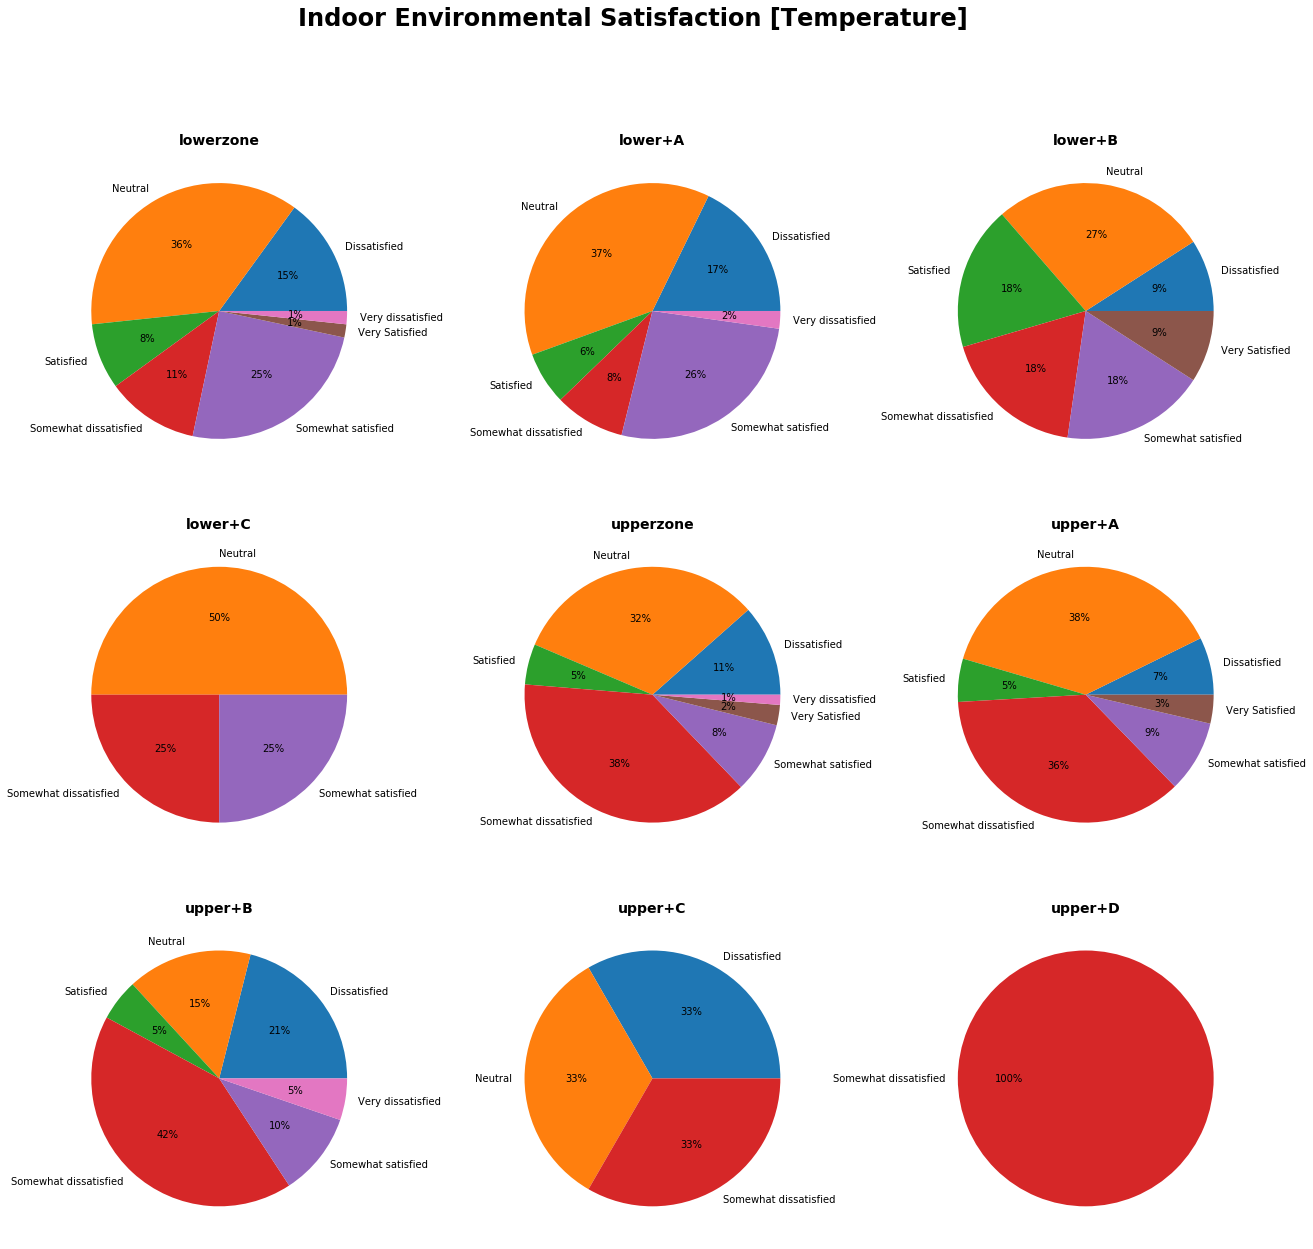

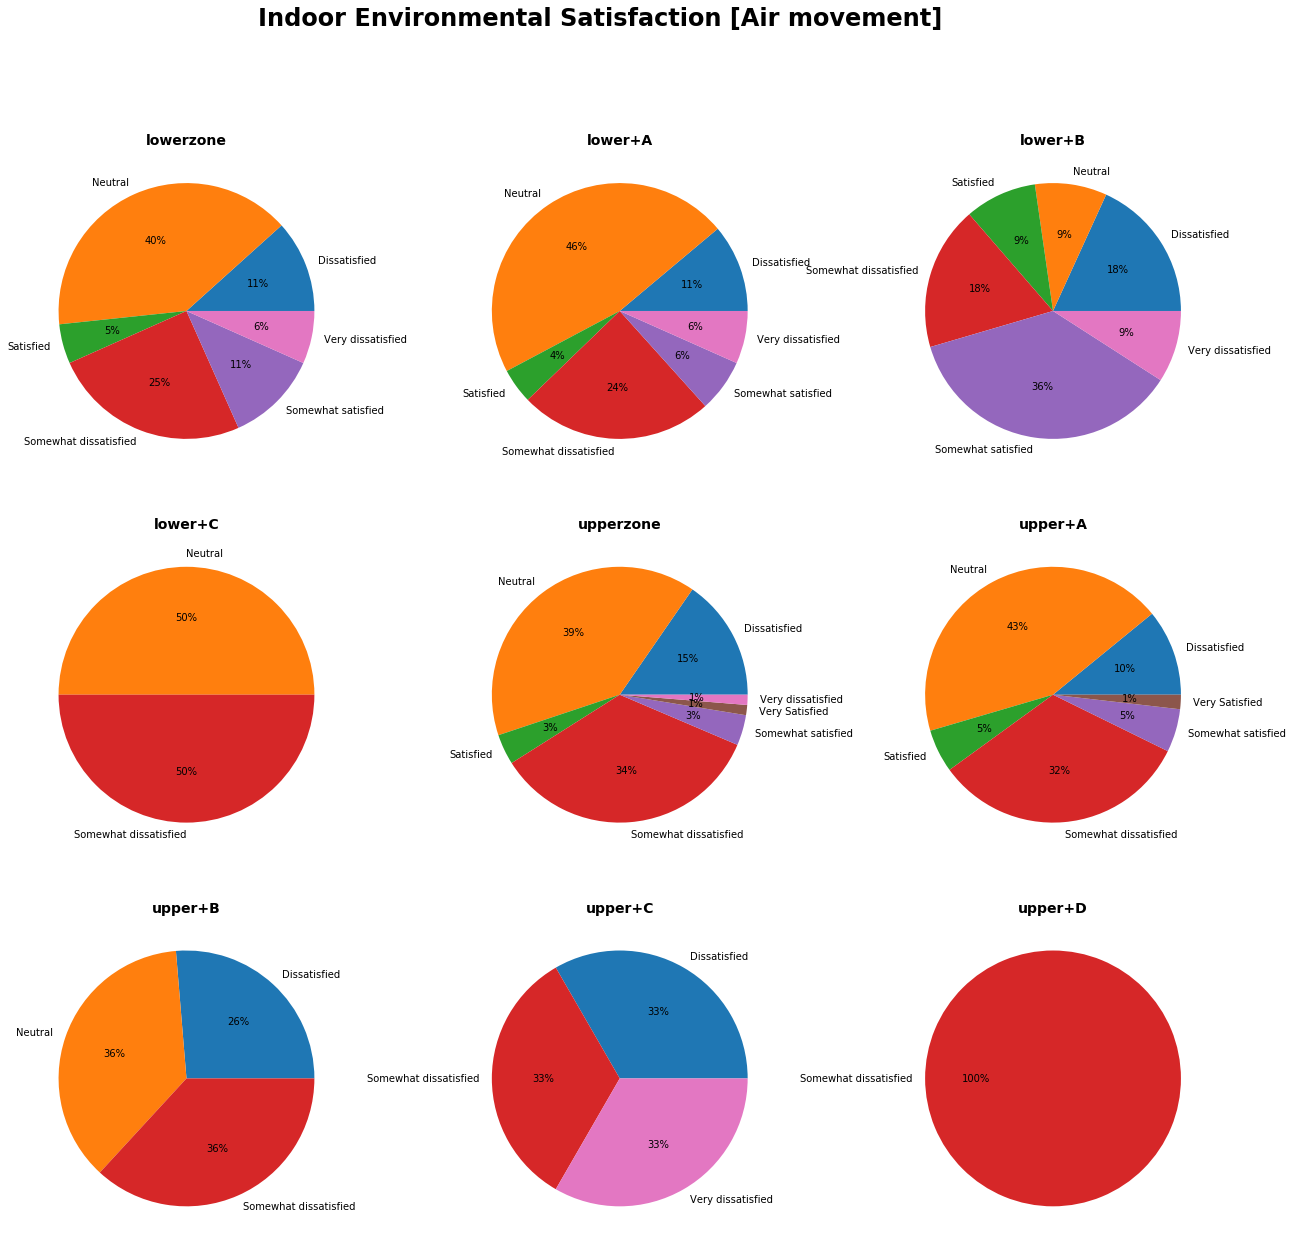

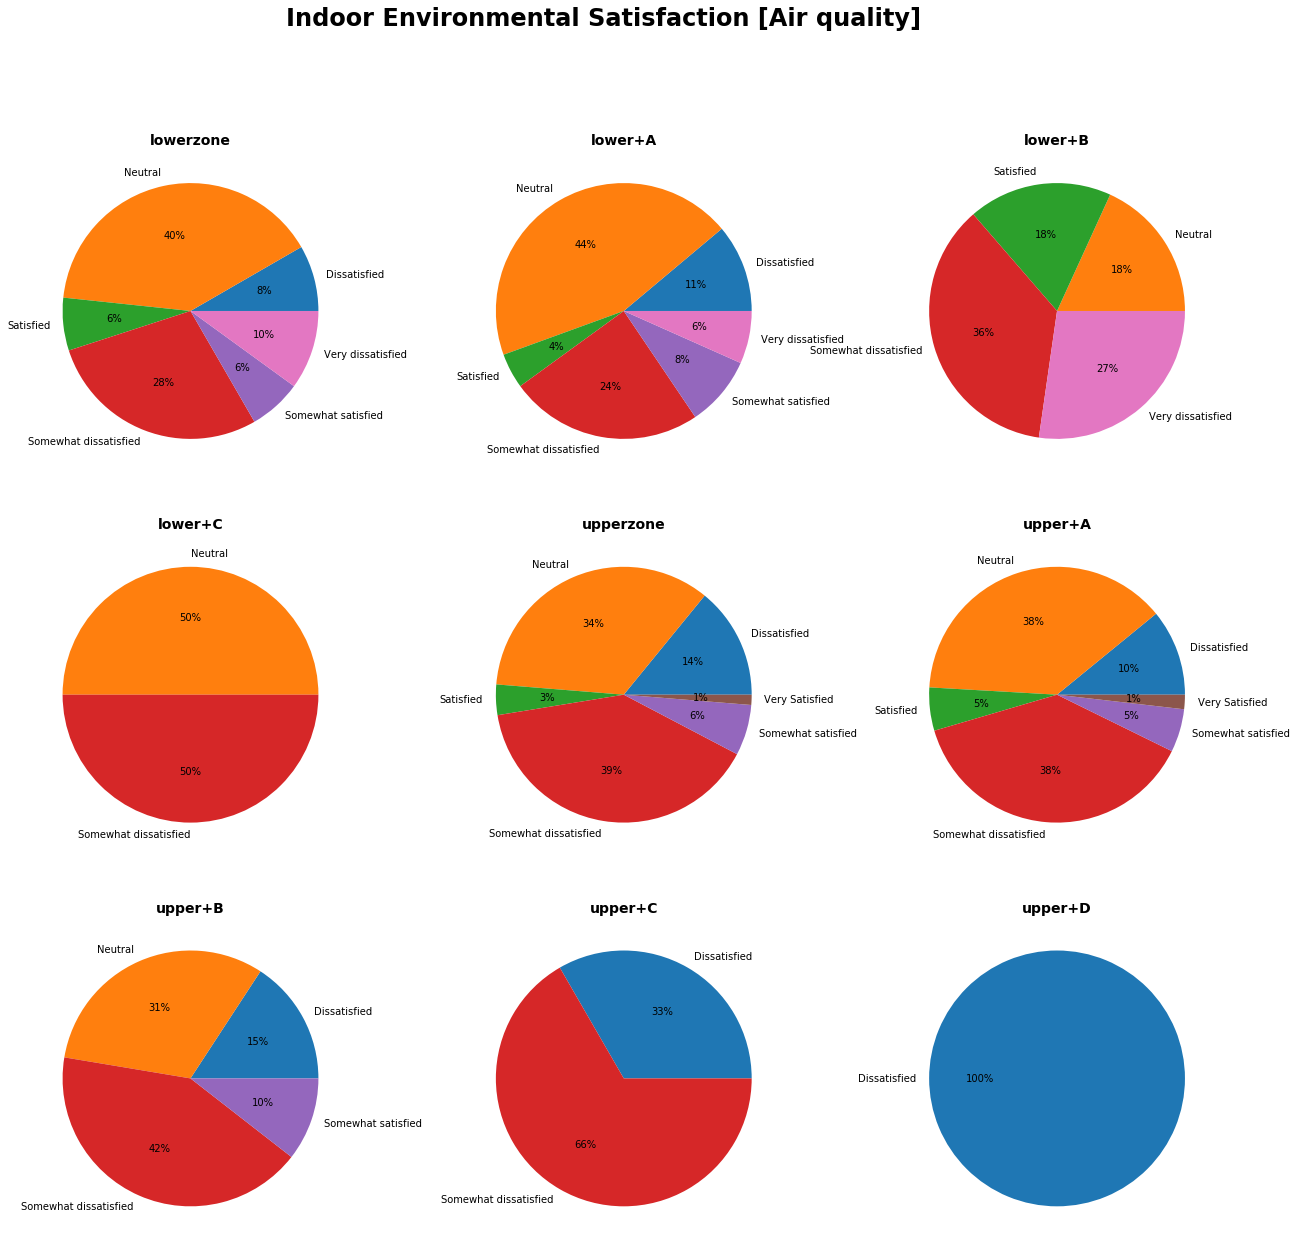

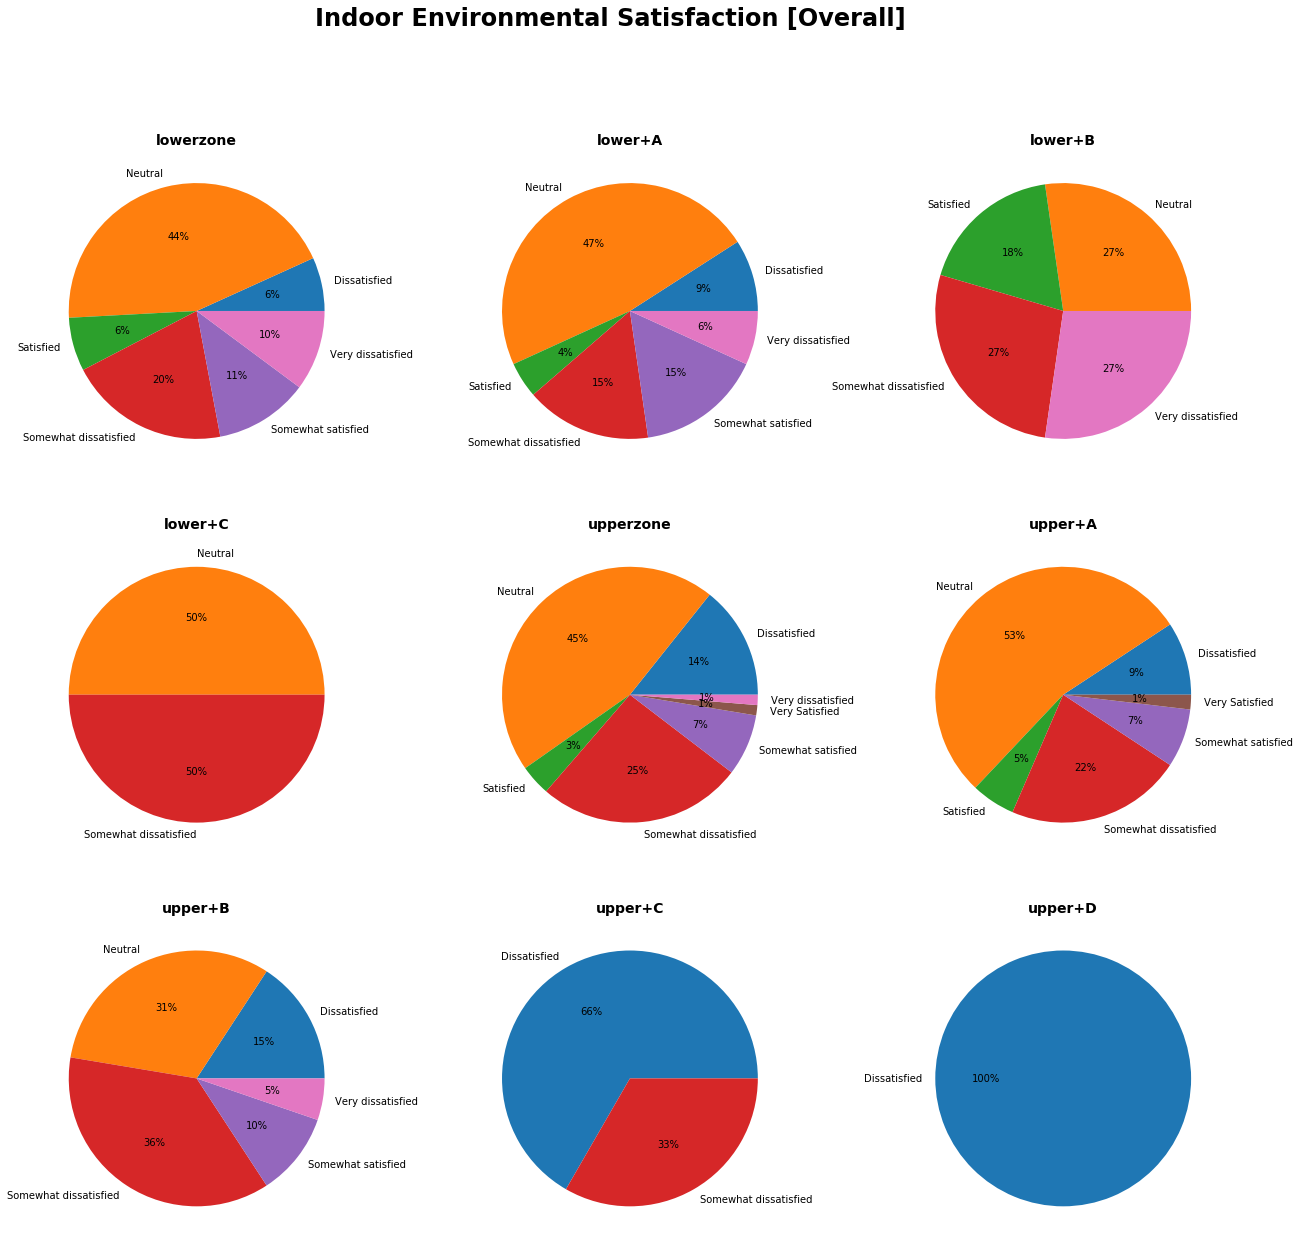

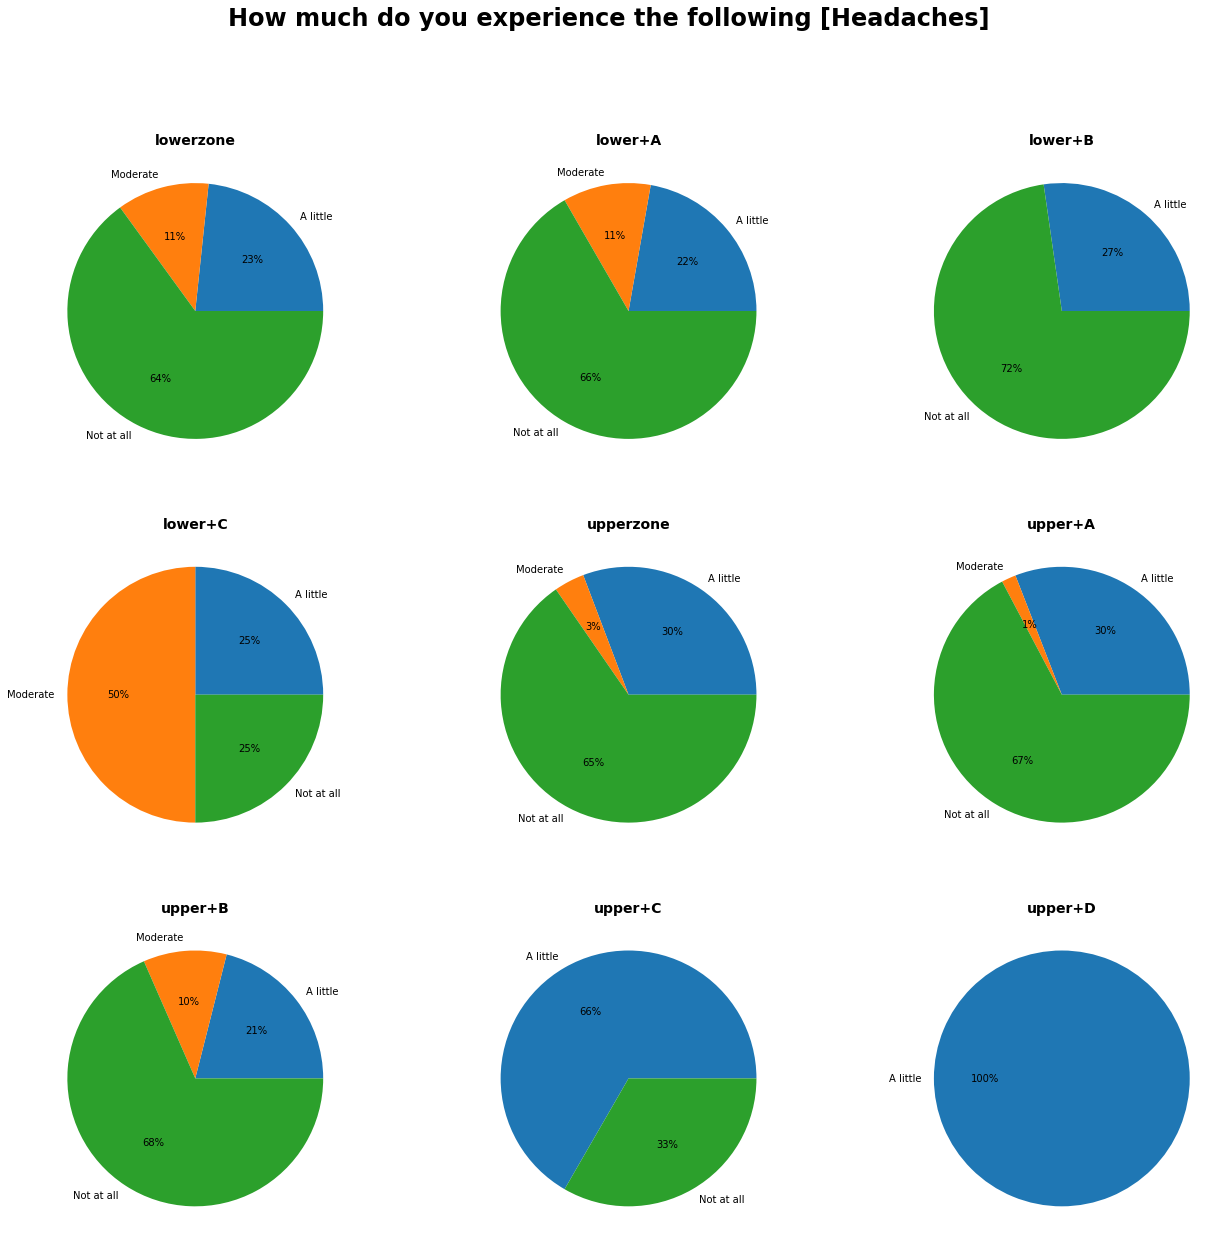

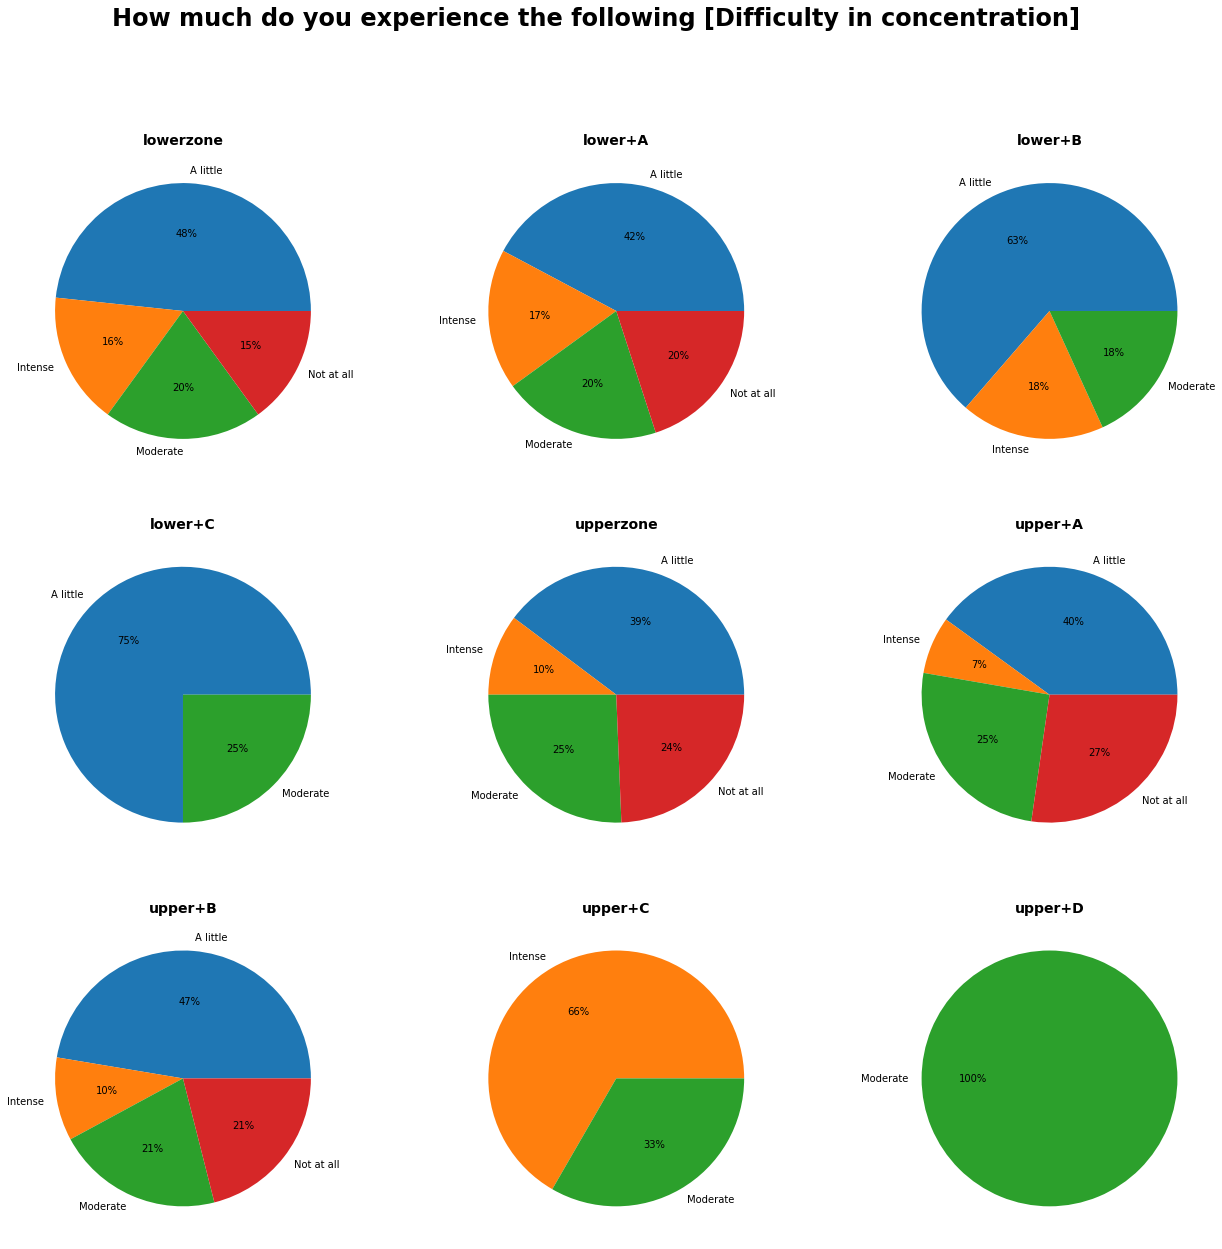

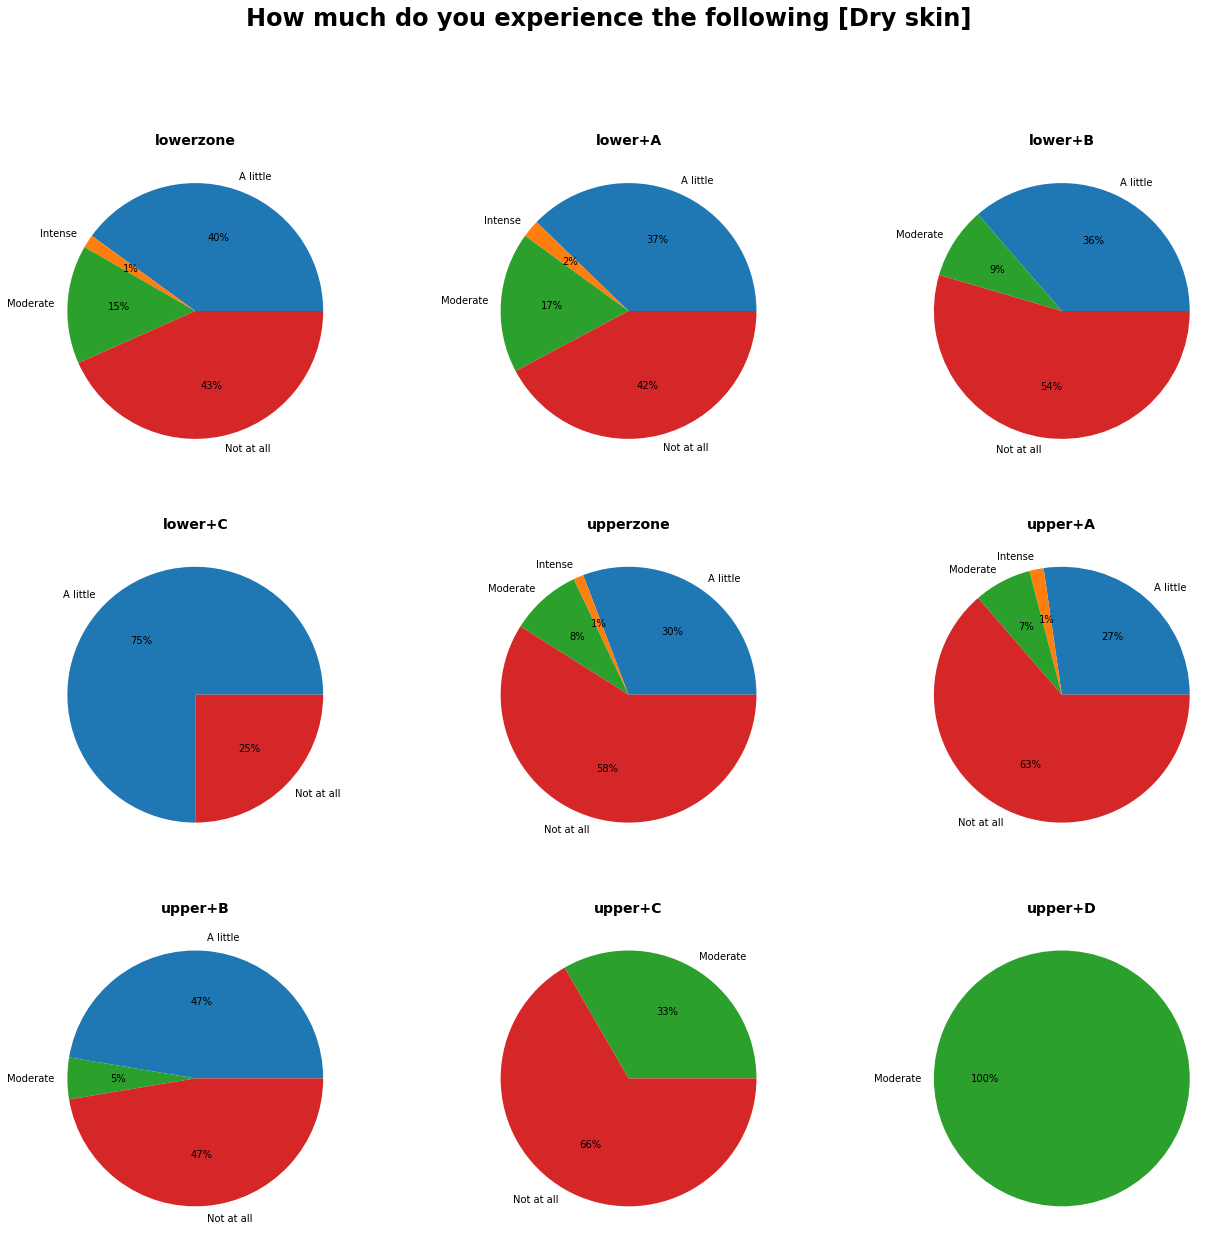

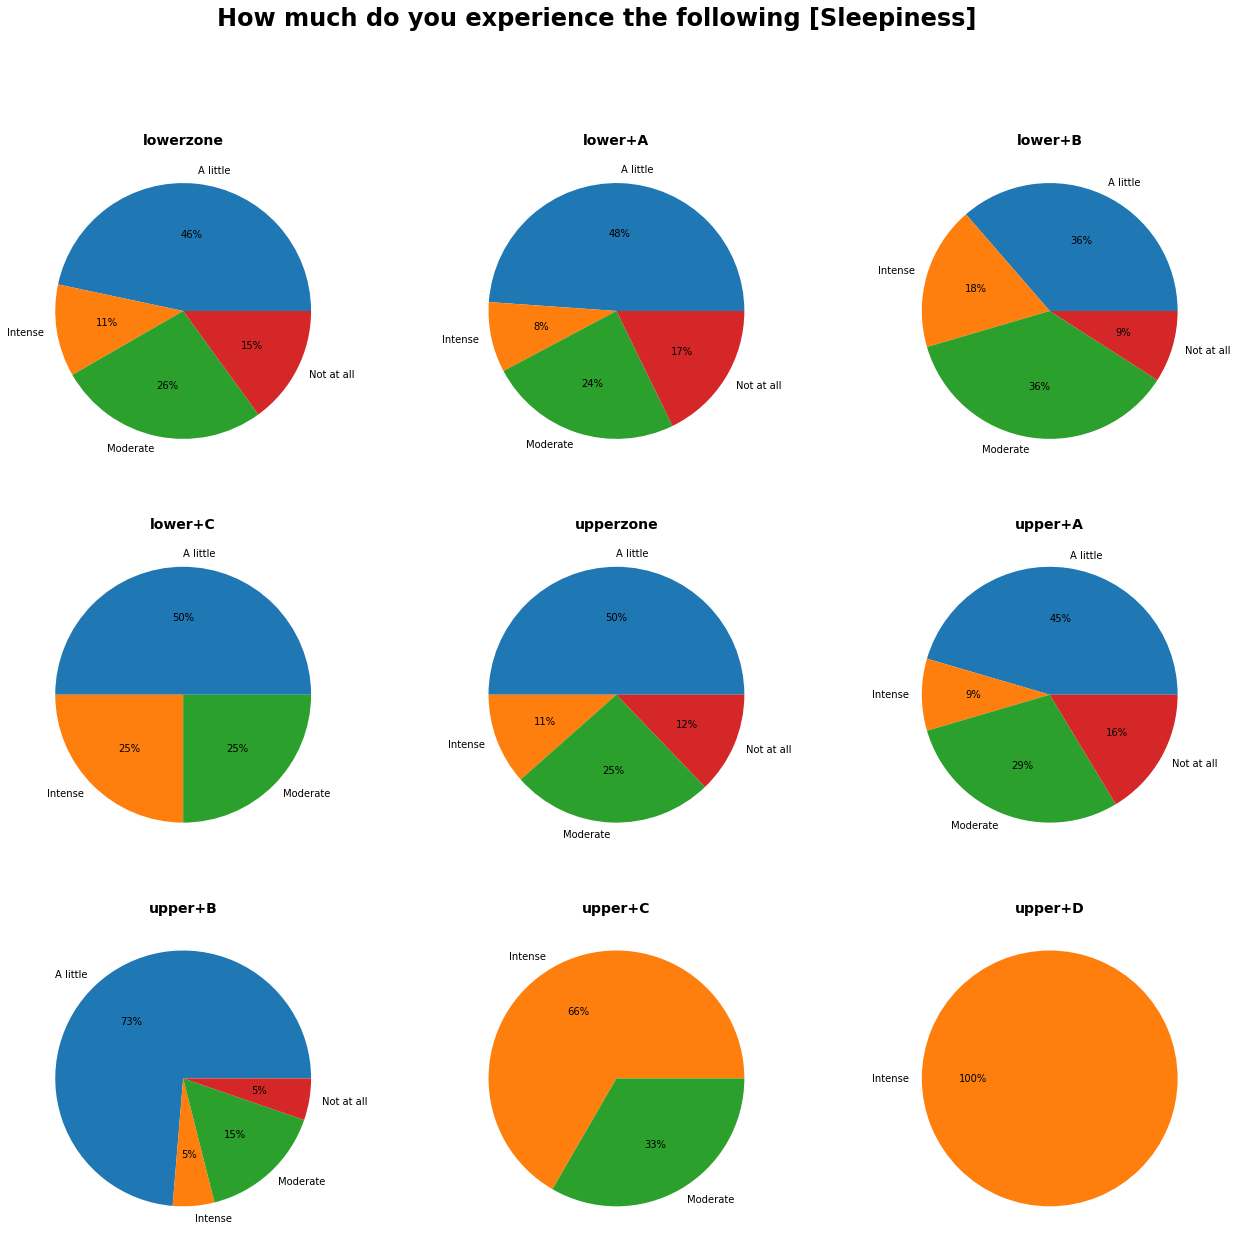

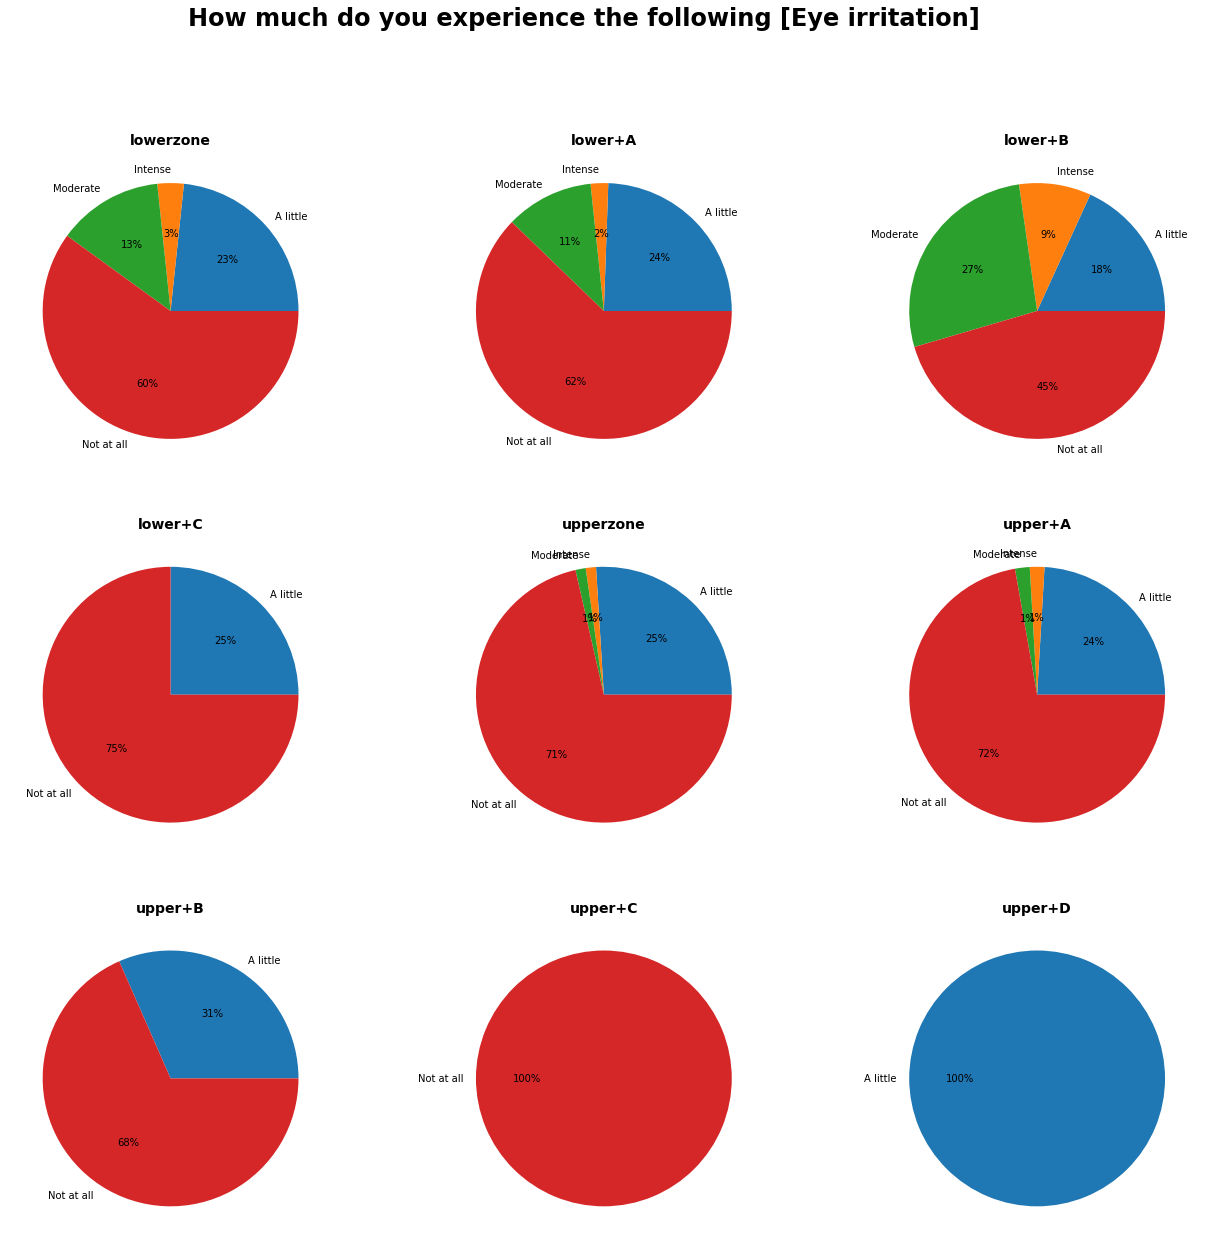

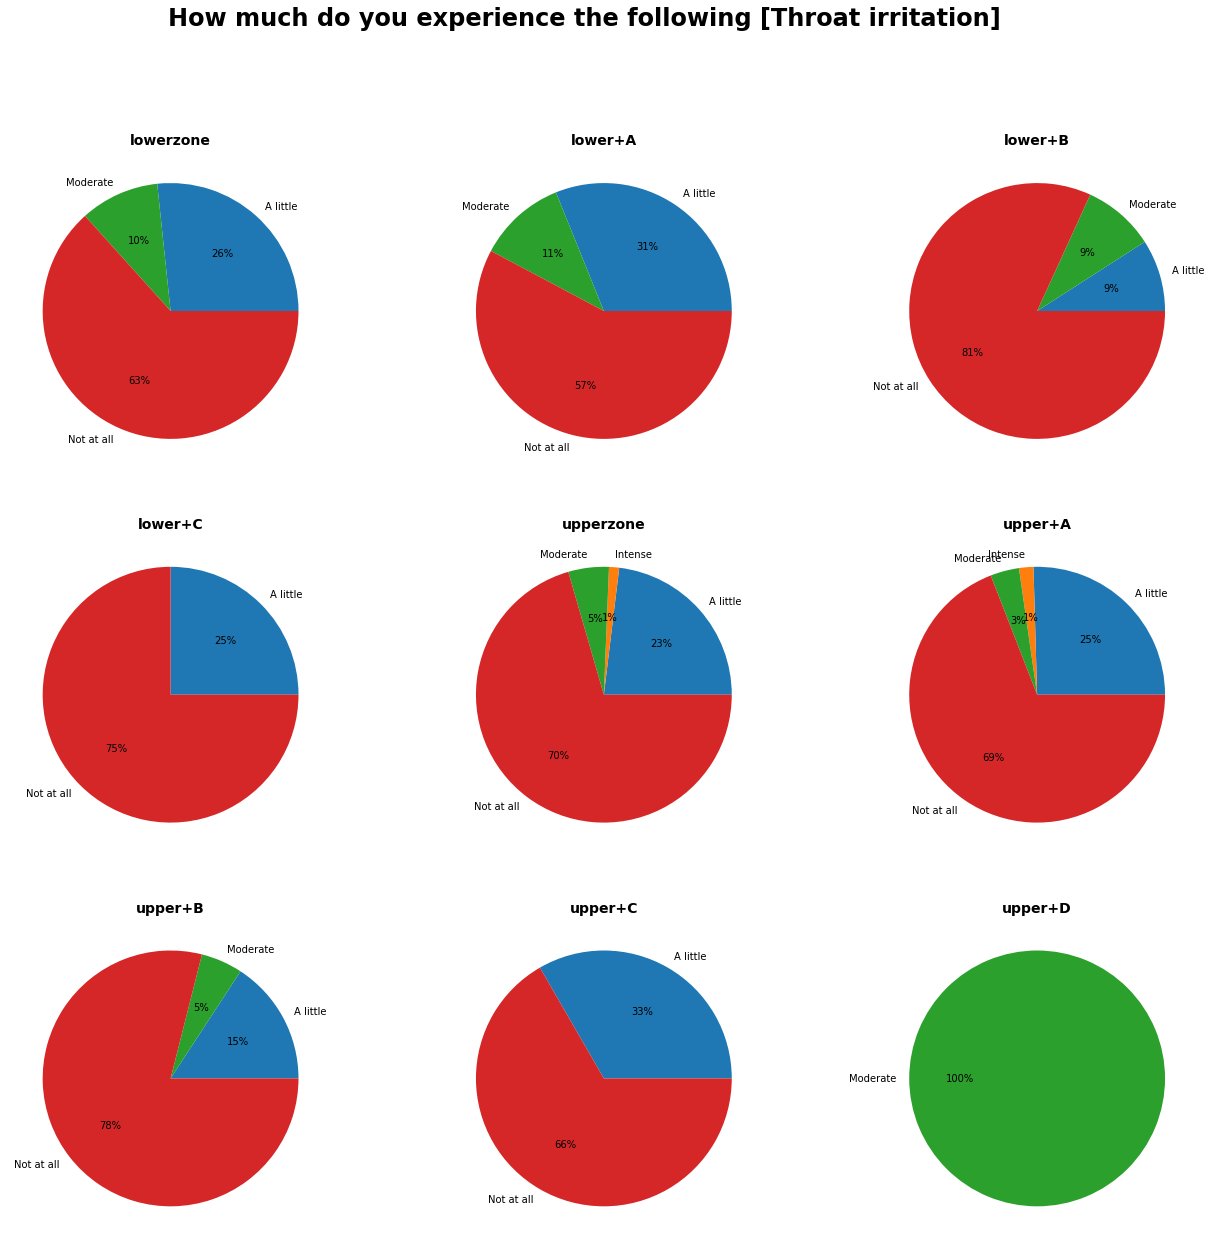

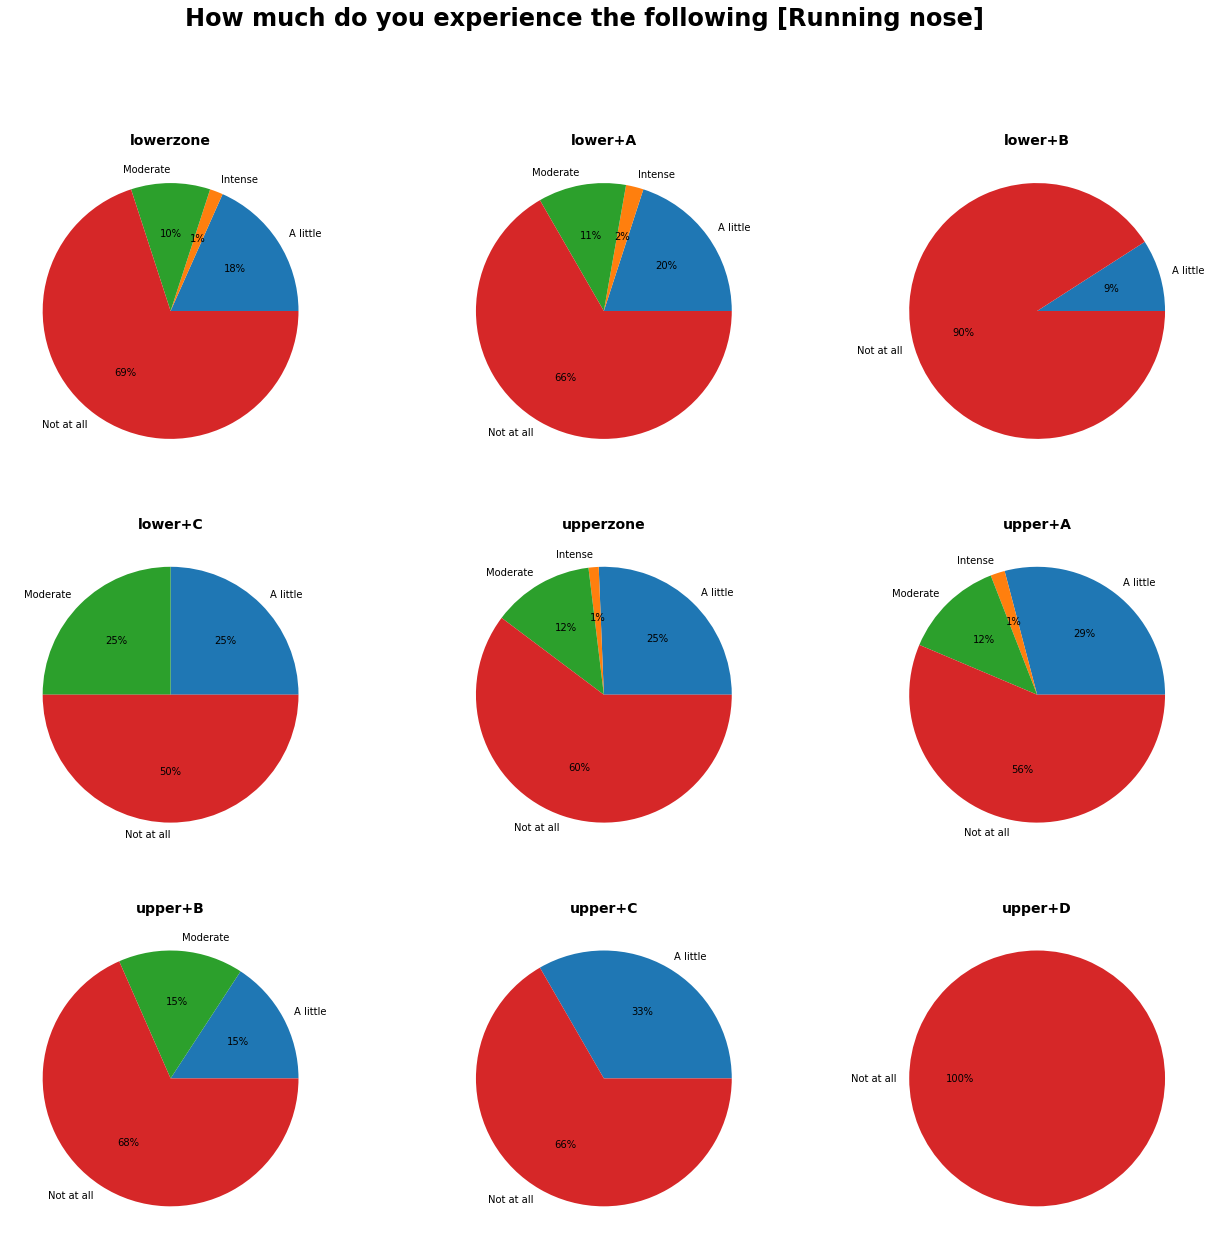

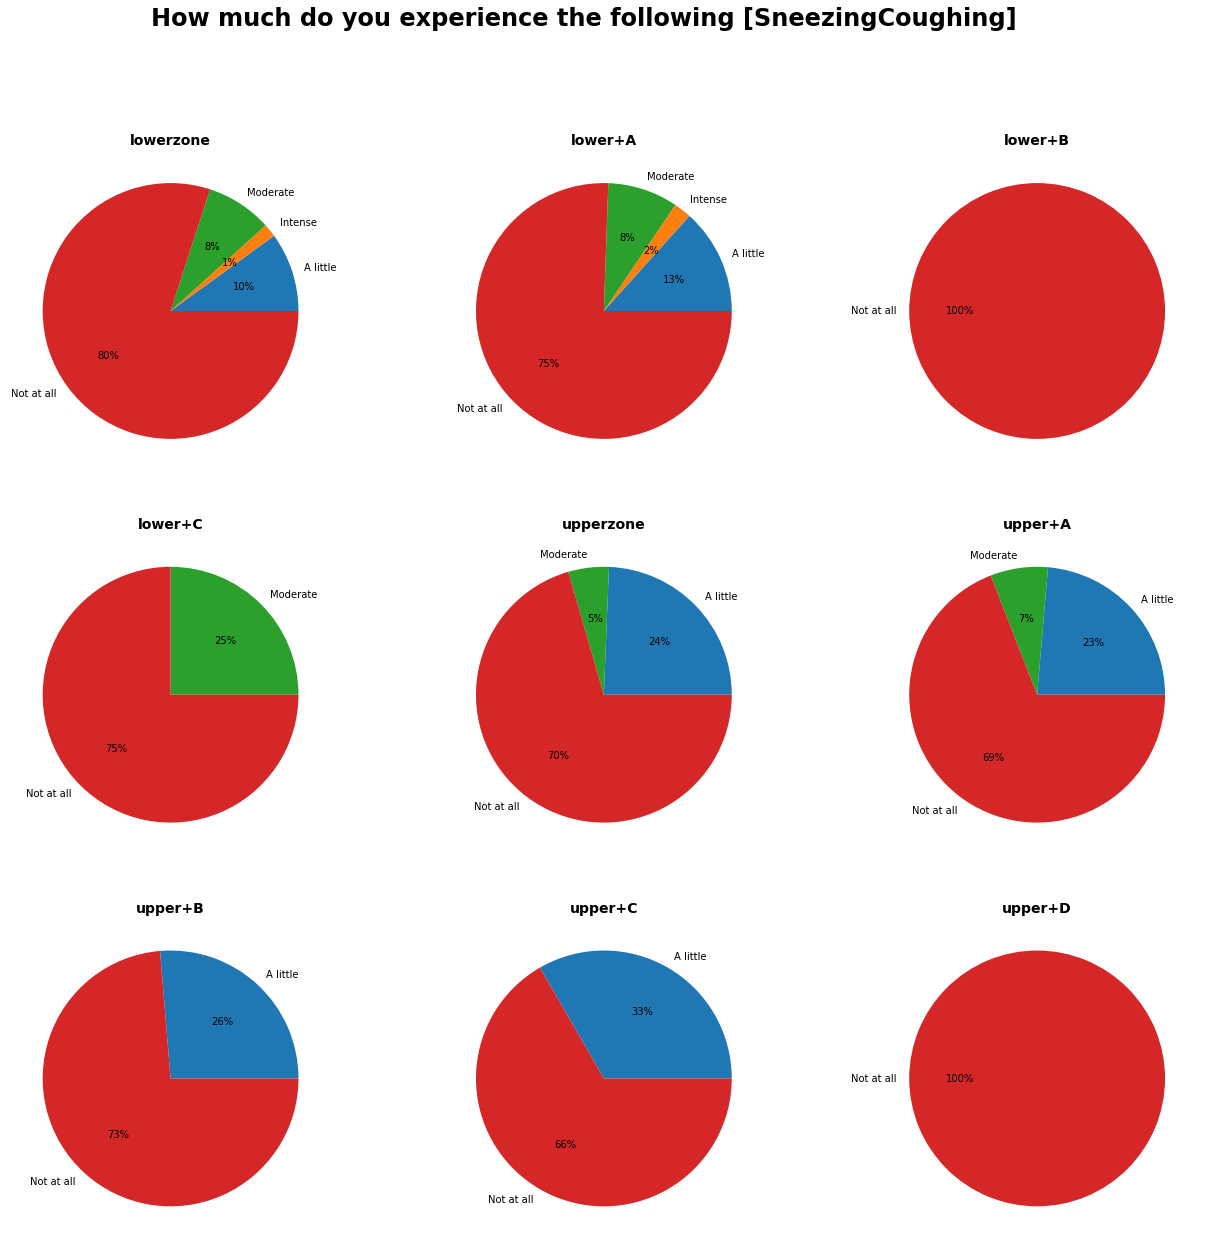

In [14]:
for survey_idx, survey_title in enumerate(survey_titles):

    fig, ax = plt.subplots(nrows=int(np.ceil(len(zones) / 3)), ncols=3, figsize=(22, 20))
    fig.suptitle(survey_title, fontsize=24, fontweight='bold')
    i = 0
    done = False
    for row in ax:
        if not done:
            for col in row:
                val_cnt = all_data[zones[i]].iloc[:, survey_idx + 5].value_counts()
                
                # fill in missing class with a zero count
                for j in class_dict[survey_title]:
                    if j not in val_cnt.index:
                        val_cnt[j] = 0
                
                val_cnt.sort_index(inplace=True)
                # total_cnt = val_cnt.sum()
                labs = val_cnt.index.tolist()
                                
                # change labels to null string for zero counts
                # labs_percent = list(map(lambda x: str(int(val_cnt[x] * 100 / total_cnt)) + '%' if val_cnt[x] > 0 else '', labs))
                for idx, lab in enumerate(labs):
                    if val_cnt[lab] == 0:
                        labs[idx] = ''

                # labs = [ labs[i] + ' ' + labs_percent[i] for i in range(len(labs)) ]
                col.pie(val_cnt, labels=labs, autopct=lambda x: str(int(round(x))) + '%' if x > 0 else '')
                # col.set_title(zones[i].replace(' ', '') + '\n' + survey_title)
                col.set_title(zones[i].replace(' ', ''), fontsize=14, fontweight='bold')
                if i < (len(zones) - 1):
                    i += 1
                else:
                    done = True
                    break
    if ((i+1)%3) > 0:
        for j in range((i + 1) % 3, 3):
            ax[-1][j].axis('off')
    plt.savefig(os.path.join('images', 'allzones-' + survey_title.replace(' ', '')))
    plt.show()
    plt.close()